In [16]:
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [3]:
(dados_treino, classes_treino), (dados_teste, classes_teste) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 40s 0us/step


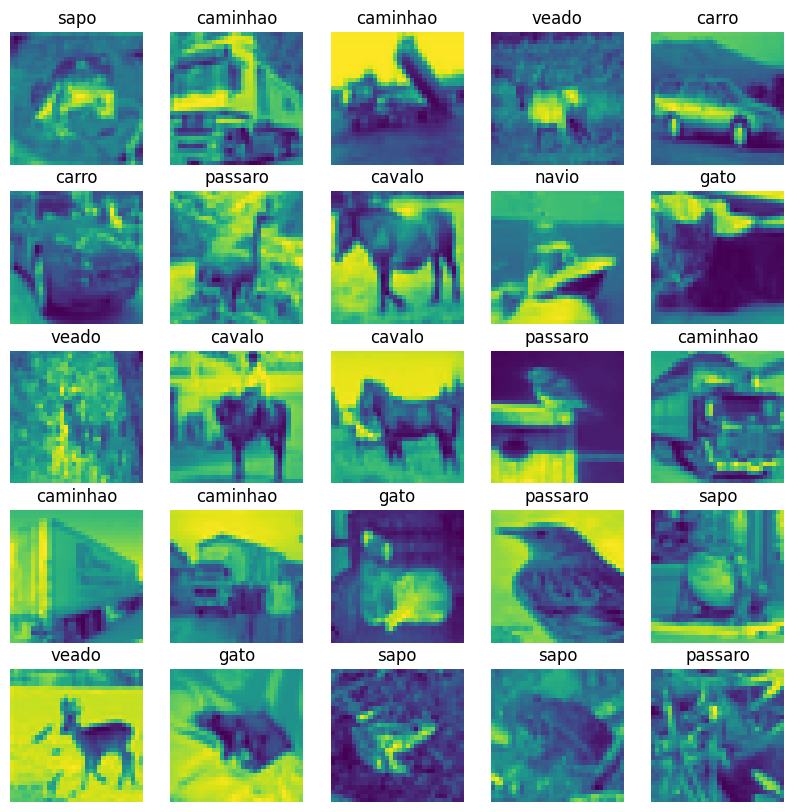

In [9]:
class_name = ['aviao', 'carro', 'passaro', 'gato', 'veado', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhao']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(dados_treino[i])
    plt.title(class_name[classes_treino[i][0]])
    plt.axis('off')

In [6]:
dados_treino  = np.dot(dados_treino[..., :3], [0.299, 0.587, 0.114])
dados_teste  = np.dot(dados_teste[..., :3], [0.299, 0.587, 0.114])

In [7]:
dados_treino  = dados_treino.astype('float32')/255.0
dados_teste  = dados_teste.astype('float32')/255.0

In [8]:
dados_treino  = np.expand_dims(dados_treino, -1)
dados_teste  = np.expand_dims(dados_teste, -1)

In [43]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape = dados_treino.shape[1:]))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# camada para transformar a imagem em vetor
model.add(tf.keras.layers.Flatten())
# camada totalmente concectada
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_4           │ (None, 32, 32, 1)      │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,142 (469.30 KB)

 Trainable params: 120,140 (469.30 KB)

 Non-trainable params: 2 (8.00 B)

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping


In [45]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [46]:
dados_perda = model.fit(dados_treino, classes_treino, epochs=10, batch_size=128, validation_split=0.1,
shuffle=True, callbacks=[early_stopping])

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 105ms/step - accuracy: 0.3497 - loss: 1.8238 - val_accuracy: 0.5418 - val_loss: 1.3623
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 39s 111ms/step - accuracy: 0.5724 - loss: 1.2443 - val_accuracy: 0.6204 - val_loss: 1.1175
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 112ms/step - accuracy: 0.6370 - loss: 1.0612 - val_accuracy: 0.6474 - val_loss: 1.0503
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.6684 - loss: 0.9695 - val_accuracy: 0.6620 - val_loss: 0.9934
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.6913 - loss: 0.8975 - val_accuracy: 0.6736 - val_loss: 0.9750
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.7061 - loss: 0.8591 - val_accuracy: 0.6722 - val_loss: 0.9790
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.7285 - loss: 0.7969 - val_accuracy: 0.6848 - val_loss: 0.9442
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.7401 - loss: 0.

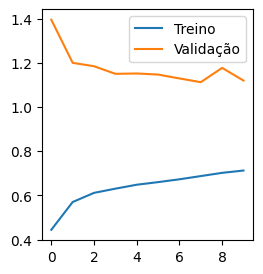

In [19]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.plot(dados_perda.history['accuracy'])
plt.plot(dados_perda.history['val_loss'])
plt.legend(['Treino', 'Validação'])

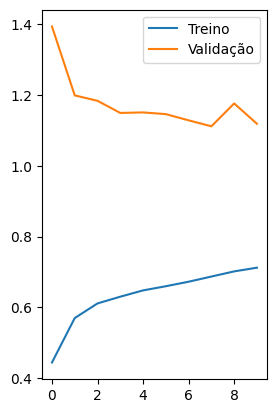

In [20]:

plt.subplot(1,2,2)
plt.plot(dados_perda.history['accuracy'])
plt.plot(dados_perda.history['val_loss'])
plt.legend(['Treino', 'Validação'])

In [17]:
model.save('modelo_cnn02.keras')

In [18]:
model = load_model('modelo_cnn02.keras')

In [47]:
scores = model.evaluate(dados_teste, classes_teste)
print(f'Acurácia: %.2f%%' % (scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6945 - loss: 0.9248
Acurácia: 68.68%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


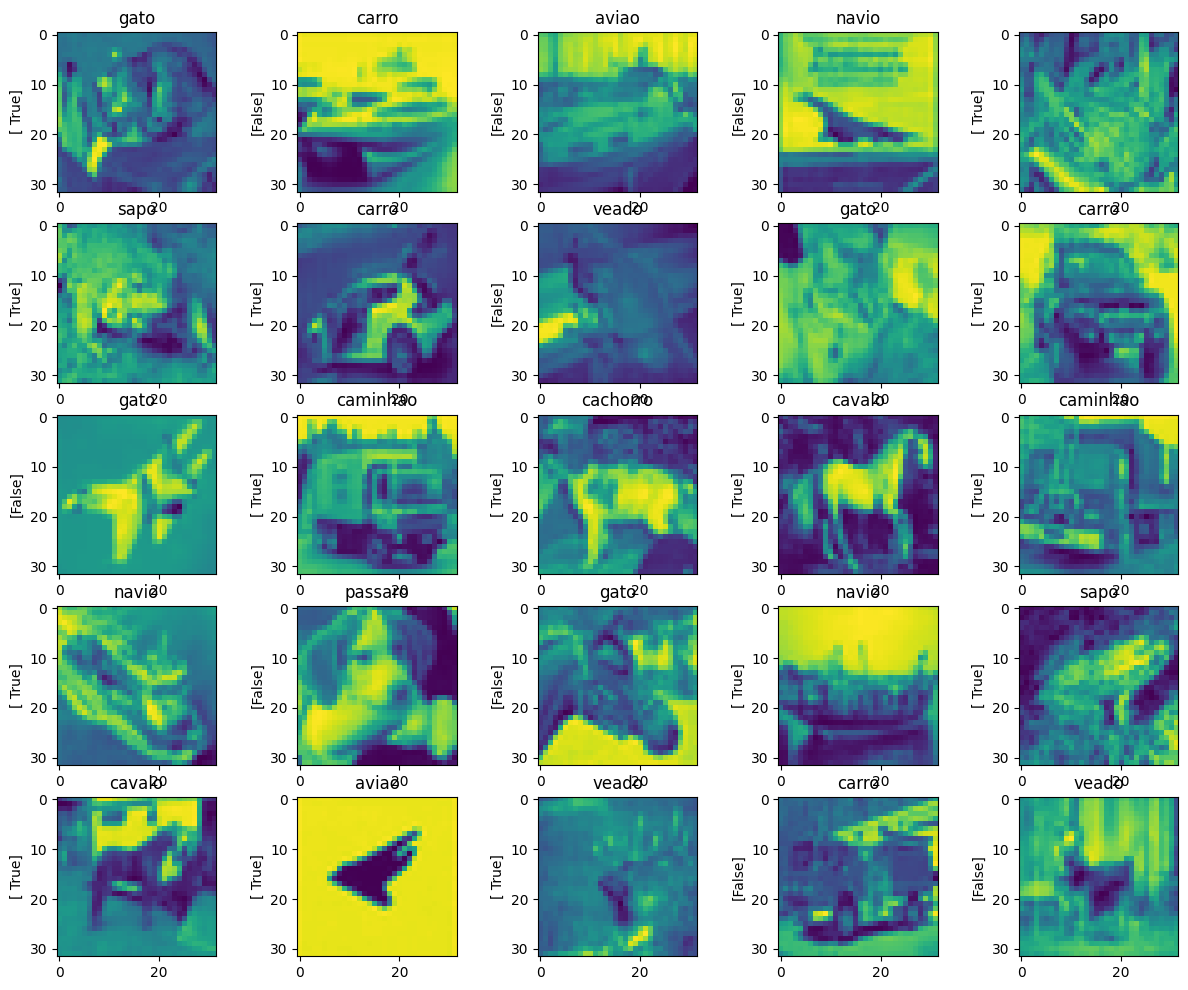

In [30]:
predction = model.predict(dados_teste)
predction = np.argmax(predction, axis=-1)

fig = plt.figure(figsize=(15,12))
for i in range(25):
    ax = fig.add_subplot(5,5, i+1)
    ax.imshow(dados_teste[i])
    predction = model.predict(dados_teste[i].reshape(1,32,32,1))
    predction = np.argmax(predction[0], axis=-1)
    ax.set_title("{}".format(class_name[predction]))
    ax.set_ylabel("{}".format(predction==classes_teste[i]))
